In [1]:
import sys
import os
import inspect

In [2]:
this_folder = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
root_folder = os.path.dirname(this_folder)

In [3]:
from matplotlib import pyplot as plt
import os
import inspect
from tqdm import tqdm

In [4]:
sys.path.append(root_folder + '\\otm')
from otm_env import *
sys.path.append(root_folder + '\\agents')
from tab_q_learning import *

In [5]:
env_init_info = {
    "time_step": 60,
    "plot_precision": 2,
    "buffer": True,
    "state_division": 3
}

configfile = 'network_1.xml'

env = otmEnv(env_init_info, configfile)

agent_init_info = {
            "num_states": env_init_info["state_division"]**(env.otm4rl.num_intersections * env.otm4rl.num_stages),
            "num_actions": env.otm4rl.num_stages**env.otm4rl.num_intersections,
            "state_division": env.state_division,
            "epsilon": 0.5,
            "step_size": 0.1,
            "discount": 0.9,
            "seed": 0
            }

agent = QLearningAgent()
agent.agent_init(agent_init_info)

 10%|▉         | 1998/20000 [01:21<12:30, 24.00it/s]

Time-step: 2000/20000


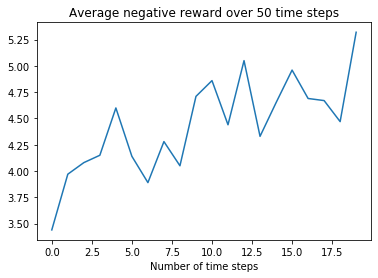

 20%|█▉        | 3997/20000 [02:41<10:26, 25.56it/s]

Time-step: 4000/20000


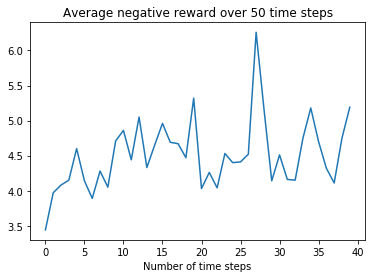

 30%|██▉       | 5998/20000 [04:02<09:24, 24.82it/s]

Time-step: 6000/20000


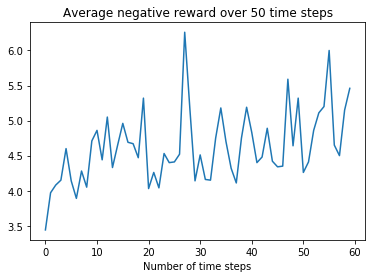

 40%|███▉      | 7999/20000 [05:22<09:02, 22.10it/s]

Time-step: 8000/20000


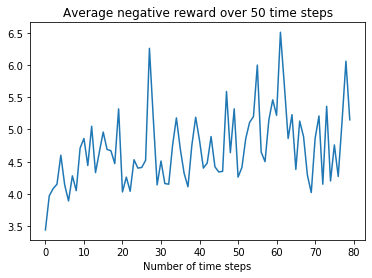

 50%|████▉     | 9999/20000 [06:42<06:56, 24.02it/s]

Time-step: 10000/20000


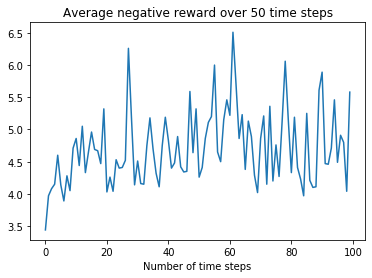

 60%|█████▉    | 11997/20000 [08:03<05:14, 25.42it/s]

Time-step: 12000/20000


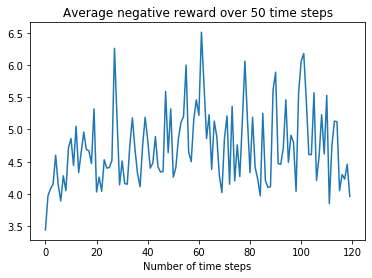

 70%|██████▉   | 13998/20000 [09:25<03:59, 25.06it/s]

Time-step: 14000/20000


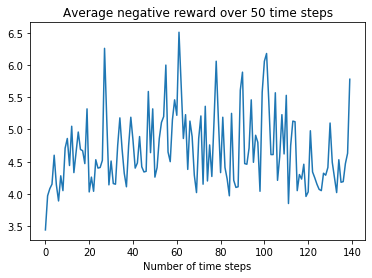

 80%|███████▉  | 15999/20000 [10:49<02:52, 23.15it/s]

Time-step: 16000/20000


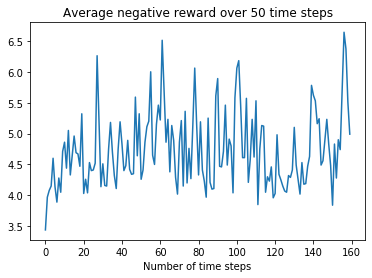

 90%|████████▉ | 17999/20000 [12:13<01:23, 23.95it/s]

Time-step: 18000/20000


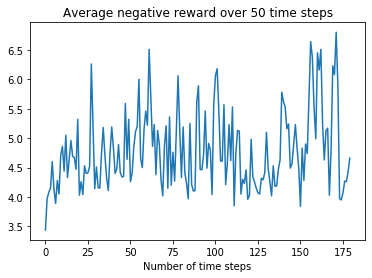

100%|█████████▉| 19999/20000 [13:38<00:00, 23.88it/s]

Time-step: 20000/20000


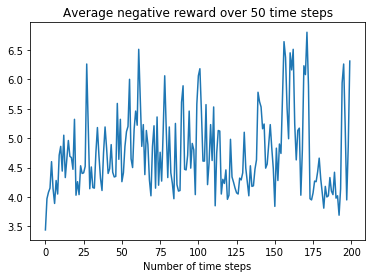

100%|██████████| 20000/20000 [13:38<00:00, 24.44it/s]


In [6]:
acc_neg_reward = [] # Contains negative sum of rewards during episode
num_steps = 10000   # The number of steps to run the simulation
reward_sum = 0

state = env.reset("current")
action = agent.agent_start(state)
    
for i in tqdm(range(num_steps)):
    
    state, reward = env.step(action)
    action = agent.agent_step(reward, state)
    
    reward_sum += reward
    
    if (i+1) % 200 == 0:
        acc_neg_reward.append(-reward_sum/100)
        reward_sum = 0
    
    if (i+1) % 2000 == 0:
        print("Time-step: " + str(i+1) + "/" + str(num_steps))
        plt.plot(range(len(acc_neg_reward)), acc_neg_reward)
        plt.xlabel("Number of time steps")
        plt.title("Average negative reward over 50 time steps")
        plt.show()

In [7]:
agent.q

array([[  0.        ,   0.        ,  -0.1       ,   0.        ],
       [ -0.3       ,  -1.88861102,  -0.37896101,   0.        ],
       [ -1.64207937,  -0.1       ,  -0.2       ,  -0.78521998],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  -0.3       ],
       [  0.        ,   0.        ,  -0.209     ,   0.        ],
       [ -1.15492603,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  -0.5       ,   0.        ],
       [  0.        ,  -0.87373099,   0.        ,  -0.35584009],
       [-25.58633847, -25.25626695, -25.21887081, -23.15112008],
       [-29.74456586, -28.7509844 , -29.4886422 , -28.79970038],
       [ -6.57597587,  -2.86386321,  -5.45952541,  -2.2741476 ],
       [-28.49613036, -23.77497148, -24.3478428 , -24.84685583],
       [-26.70376126, -26.84152376, -26.29152022, -23.39655639],
       [-11.84321981,  -8

Text(0.5, 1.0, 'Average negative reward over 50 time steps')

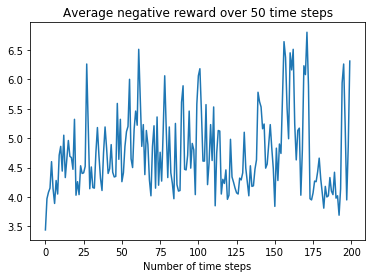

In [8]:
plt.plot(range(len(acc_neg_reward)), acc_neg_reward)
plt.xlabel("Number of time steps")
plt.title("Average negative reward over 50 time steps")

In [18]:
env.close()
env.start()
state = env.reset("current")
rewards = []
for i in range(200):
    state = agent.encode_state(state)
    action = agent.argmax(agent.q[state])
    state, reward = env.step(action)
    rewards.append(reward)
    
print(np.mean(rewards[-10:]))

-5.0


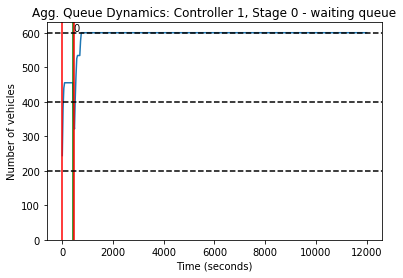

In [15]:
env.plot_agg_queue(1, 0, "waiting")

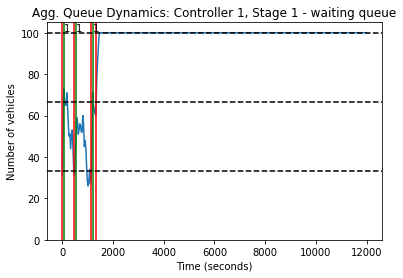

In [11]:
env.plot_agg_queue(1, 1, "waiting")

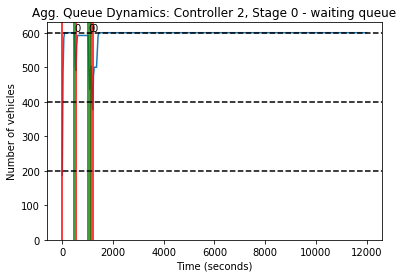

In [12]:
env.plot_agg_queue(2, 0, "waiting")

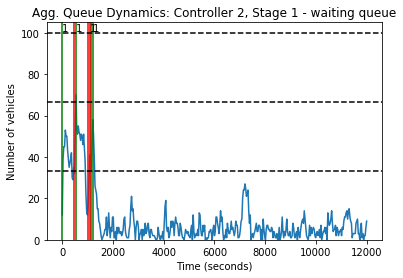

In [13]:
env.plot_agg_queue(2, 1, "waiting")